# Part II - (Presentation Title)
## by (Okwechime Dennis)

## Investigation Overview
 This report is aimed at showing when most trips where taken based on the week day as well as the time of the day by clients on the bike platform.
    This report also aims to show the relationship between the period when trips are being taken and the nature of the clients either they are the platform members or casual customers.

## Dataset Overview

Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area , the dataset consists of 183,412 rows and 16 columns. the columns are namely ( duration_sec, start_time, end_time, start_station_is, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#accessing the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#drop the null values and piping it into a new dataframe
df_clean = df
df_clean.dropna(inplace = True)

In [5]:
# change the datatypes of the columns
# change the start and end time to date time format
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [6]:
#Data wrangling and creation of needed columns
#create the start and end hour of the day column from the start and end time columns
df_clean['start_hour_of_day'] = df_clean['start_time'].dt.strftime('%I %p')
df_clean['end_hour_of_day'] = df_clean['end_time'].dt.strftime('%I %p')

In [7]:
# convert the columns to category data type
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

In [8]:
# create the year , month and day of week column from the start time column
df_clean['start_year'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%Y')
df_clean['start_month'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%B')
df_clean['start_day_of_week'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%A')

In [9]:
df_clean['duration_min'] = df_clean['duration_sec']/60

- Distribution of Trips Duration

Charting the diistribution of trip duration in seconds on a log scale transformation, to show the spread of trip duration on the platform.





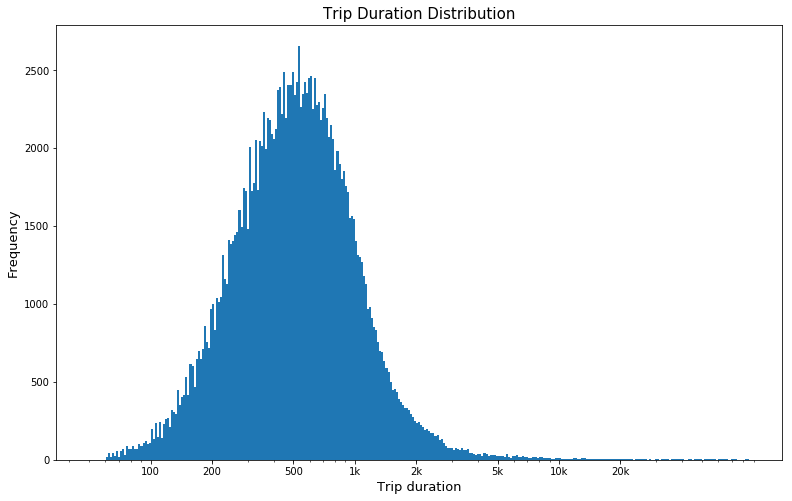

In [10]:
#charting the trip duration on a log scale

logbinsize = 0.01

plt.figure(figsize = [13,8])

bins = 10** np.arange(1.7, np.log10(df['duration_sec'].max())+logbinsize, logbinsize)

plt.hist(data = df, x = 'duration_sec', bins = bins)

plt.xscale('log')

plt.xticks([1e2, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4], [100, 200, 500, '1k', '2k', '5k', '10k', '20k'])

plt.title('Trip Duration Distribution', size = 15)

plt.xlabel('Trip duration', size = 13)

plt.ylabel('Frequency', size = 13);

The images depict a typical distribution with an increase in duration starting at 100 seconds and a peak between 500 and 700 seconds before a gentle decline to about 5000 seconds.

 -Distribution of Trips by Day of Week)

Charting the frquency of trips by the spread along the week days to ascertain peak periods of the week


In [11]:
basecolor = sb.color_palette()[0]

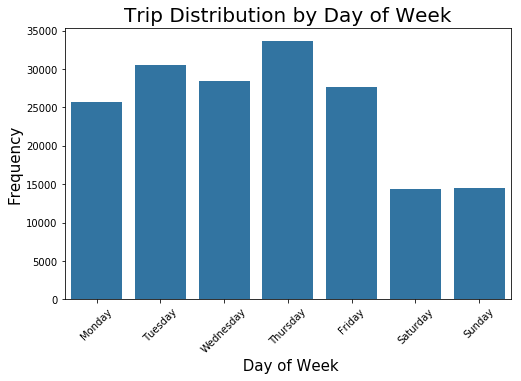

In [12]:
plt.figure(figsize = [8,5])
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data = df_clean, x = 'start_day_of_week', color = basecolor, order = weekday)
plt.xticks(rotation = 45)
plt.title('Trip Distribution by Day of Week', size = 20)
plt.xlabel(' Day of Week', size = 15)
plt.ylabel('Frequency', size = 15);

The visual depicts rising daily platform excursions starting on Mondays and reaching a high on Thursday, then gradually declining and plateauing between Saturday and Sunday.

- Trip Duration based on week day and user type

Examining the relationship between trips duration based on the day of week the trip was undertaken and the type of user.

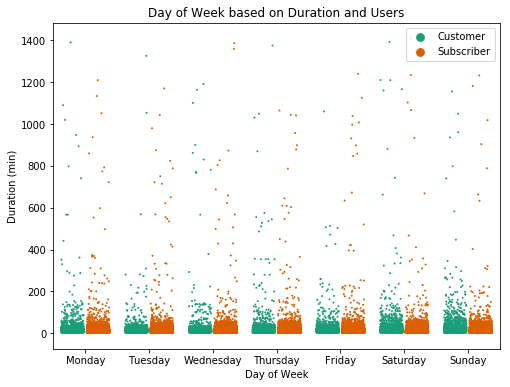

In [13]:
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean, x = 'start_day_of_week', y = 'duration_min', hue = 'user_type',
           palette = 'Dark2', dodge = True, jitter = 0.35, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Users')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

The existence of outliers skews the data, and removing the outliers will allow for a more thorough analysis of the data.

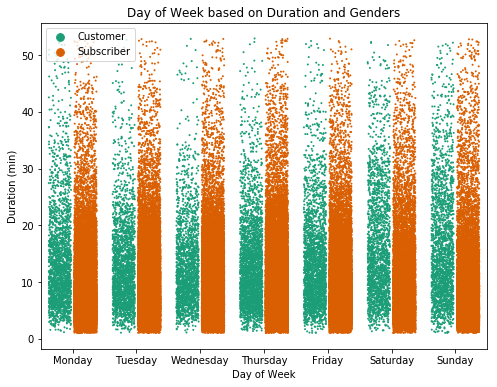

In [14]:
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean.query('duration_min<duration_min.quantile(0.99)') , x = 'start_day_of_week', y = 'duration_min', hue = 'user_type',
           palette = 'Dark2', jitter = 0.35, dodge = True, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Genders')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

Comparing the dispersion of subscribers to casual customers, who tended to undertake larger travels on weekends, reveals that while subscribers normally took shorter journeys, they also took lengthier trips that occurred throughout the whole week.

- Relationship Between Hour of the Day and Users

    Charting the relationship between the trip duration by hour of the day based on the user type of riders on the platform



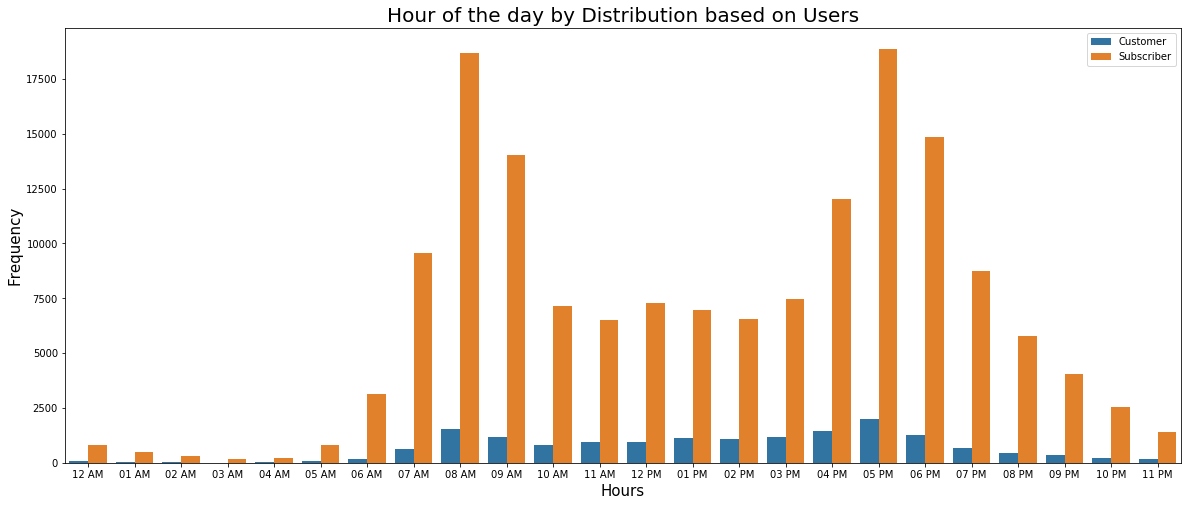

In [15]:
#relationship between start hour and user type
plt.figure(figsize = [20,8])
order = ['12 AM','01 AM','02 AM','03 AM','04 AM','05 AM','06 AM','07 AM','08 AM','09 AM','10 AM','11 AM','12 PM','01 PM','02 PM','03 PM','04 PM','05 PM','06 PM','07 PM','08 PM','09 PM','10 PM','11 PM']
sb.countplot(data = df_clean , x = 'start_hour_of_day',order = order, hue = 'user_type')
plt.title('Hour of the day by Distribution based on Users', size=20)
plt.xlabel('Hours',size=15)
plt.legend()
plt.ylabel('Frequency',size=15);

The platform's peak times for riders who are subscribers are between 8 a.m. and 5 p.m., with both having comparable peaks. Casual users have also shown a little propensity to rise during those hours. 

it can be inferred that the members of the platform often utilise it for work, which accounts for the rise in traffic during certain hours of the day.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 675296 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
